In [1]:
%cd /Users/floriankokoszka/Desktop/notebooks
%pwd

%run mc_startup.ipynb
%run myfunctions.ipynb

/Users/floriankokoszka/Desktop/notebooks


In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

No Warning Shown


In [3]:
# pip install gliderflight
import gliderflight

In [4]:
#pip install simpleaudio numpy
import simpleaudio as sa

def ping_audio(freq=700, duree=0.2, fs=44100):
    t = np.linspace(0, duree, int(fs*duree), False)
    signal = np.sin(freq * t * 2 * np.pi)
    audio = (signal * 32767).astype(np.int16)
    play = sa.play_buffer(audio, 1, 2, fs)
    play.wait_done()

In [27]:
data_dir = '/Volumes/DENISE/data/glider/teresa/glider/TERESA_L1/'
data_dir = '/Volumes/ORSO/TERESA/glider/TERESA_L1/'

In [30]:
FN = []

fn = 'dep0005_teresa_cnr-teresa_L1_2015-08-11_data_dt.nc'; FN.append(fn)
fn = 'dep0001_teresa_cnr-teresa_L1_2017-04-06_data_dt.nc'; FN.append(fn)
fn = 'dep0003_teresa_cnr-teresa_L1_2017-11-02_data_dt.nc'; FN.append(fn)
fn = 'dep0004_teresa_cnr-teresa_L1_2018-04-23_data_dt.nc'; FN.append(fn)
fn = 'dep0006_teresa_cnr-teresa_L1_2020-02-19_data_dt.nc'; FN.append(fn)
fn = 'dep0007_teresa_cnr-teresa_L1_2020-03-12_data_dt.nc'; FN.append(fn)
#fn = 'dep0008_teresa_cnr-teresa_L1_2022-09-07_data_dt.nc'; FN.append(fn)
#fn = 'dep0009_teresa_cnr-teresa_L1_2022-12-13_data_dt.nc'; FN.append(fn)
#fn = 'dep0010_teresa_cnr-teresa_L1_2023-07-11_data_dt.nc'; FN.append(fn)
#fn = 'dep0011_teresa_cnr-teresa_L1_2024-05-22_data_dt.nc'; FN.append(fn)

In [32]:
fn = FN[-1]
print(fn)
f = nc4.Dataset(data_dir+fn, 'r')
variable_names = list(f.variables.keys())
#print(variable_names)

variable_info = {var: (f.variables[var].dimensions, f.variables[var].size)
                 for var in f.variables}
for var, (dims, size) in variable_info.items():
    print(f"Variable: {var}, Dimensions: {dims}, Number of elements: {size}")
    toto = 1
f.close()

dep0007_teresa_cnr-teresa_L1_2020-03-12_data_dt.nc
Variable: conductivity, Dimensions: ('time',), Number of elements: 5207764
Variable: density, Dimensions: ('time',), Number of elements: 5207764
Variable: depth, Dimensions: ('time',), Number of elements: 5207764
Variable: depth_ctd, Dimensions: ('time',), Number of elements: 5207764
Variable: distance_over_ground, Dimensions: ('time',), Number of elements: 5207764
Variable: heading, Dimensions: ('time',), Number of elements: 5207764
Variable: latitude, Dimensions: ('time',), Number of elements: 5207764
Variable: longitude, Dimensions: ('time',), Number of elements: 5207764
Variable: oxygen_concentration, Dimensions: ('time',), Number of elements: 5207764
Variable: oxygen_saturation, Dimensions: ('time',), Number of elements: 5207764
Variable: pitch, Dimensions: ('time',), Number of elements: 5207764
Variable: pressure, Dimensions: ('time',), Number of elements: 5207764
Variable: profile_direction, Dimensions: ('time',), Number of elem

### Lx for FM

In [5]:
data_dir = '/Volumes/DENISE/data/glider/teresa/glider/TERESA_L0/'
data_dir = '/Volumes/ORSO/TERESA/glider/TERESA_L0/'

In [6]:
FN = []

fn = 'dep0005_teresa_cnr-teresa_L0_2015-08-11_data_dt.nc'; FN.append(fn)
fn = 'dep0001_teresa_cnr-teresa_L0_2017-04-06_data_dt.nc'; FN.append(fn)
fn = 'dep0003_teresa_cnr-teresa_L0_2017-11-02_data_dt.nc'; FN.append(fn)
fn = 'dep0004_teresa_cnr-teresa_L0_2018-04-23_data_dt.nc'; FN.append(fn)
fn = 'dep0006_teresa_cnr-teresa_L0_2020-02-19_data_dt.nc'; FN.append(fn)
fn = 'dep0007_teresa_cnr-teresa_L0_2020-03-12_data_dt.nc'; FN.append(fn)
#fn = 'dep0008_teresa_cnr-teresa_L0_2022-09-07_data_dt.nc'; FN.append(fn)
#fn = 'dep0009_teresa_cnr-teresa_L0_2022-12-13_data_dt.nc'; FN.append(fn)
#fn = 'dep0010_teresa_cnr-teresa_L0_2023-07-11_data_dt.nc'; FN.append(fn)
#fn = 'dep0011_teresa_cnr-teresa_L0_2024-05-22_data_dt.nc'; FN.append(fn)


In [7]:
fn = FN[-1]
print(fn)
f = nc4.Dataset(data_dir+fn, 'r')
variable_names = list(f.variables.keys())
#print(variable_names)

variable_info = {var: (f.variables[var].dimensions, f.variables[var].size)
                 for var in f.variables}
for var, (dims, size) in variable_info.items():
    #print(f"Variable: {var}, Dimensions: {dims}, Number of elements: {size}")
    toto = 1
f.close()

dep0007_teresa_cnr-teresa_L0_2020-03-12_data_dt.nc


In [8]:
import time
tic = time.time()

f = nc4.Dataset(data_dir+fn, 'r')

tctd = np.array(f.variables["sci_ctd41cp_timestamp"])
T = np.array(f.variables["sci_water_temp"])          # Température
C = np.array(f.variables["sci_water_cond"])          # Conductivité
P = np.array(f.variables["sci_water_pressure"])       # Pression
pitch = np.array(f.variables["m_pitch"])            # Angle de tangage (pitch)
roll = np.array(f.variables["m_roll"])            # Angle de tangage (pitch)

buoyancy_change = np.array(f.variables["m_de_oil_vol"])

#lon = np.array(f.variables["m_gps_lon"])
#lat = np.array(f.variables["m_gps_lat"])

lon = np.array(f.variables["m_lon"])
lat = np.array(f.variables["m_lat"])

f.close()

print('L0 - netcdf loaded')
toc = time.time()
print(f"Elapsed time: {np.round((toc - tic)/60,3)} min")

ping_audio(880)
ping_audio(440,.1)

L0 - netcdf loaded
Elapsed time: 1.076 min


In [33]:
tctd0 = tctd*1
T0 = T*1
C0 = C*1      # Conductivité
P0 = P*1      # Pression
pitch0 = pitch*1         # Angle de tangage (pitch)
buoyancy_change0 =  buoyancy_change*1
roll0 = roll*1

lon0 = lon*1
lat0 = lat*1

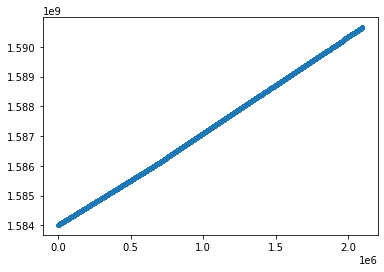

In [38]:
plt.plot(tctd0[wi],'.')

In [10]:
# wi, w, w0, w1, w2

In [34]:
wi = np.where((tctd0<1e100) & (tctd0>0))[0]; print(len(wi))


2098050


In [12]:
w = np.where(T0<1e100)[0]; print(len(w))
w = np.where(C0<1e100)[0]; print(len(w))
w = np.where(P0<1e100)[0]; print(len(w))


2098335
2098335
2098335


1550361
0
0


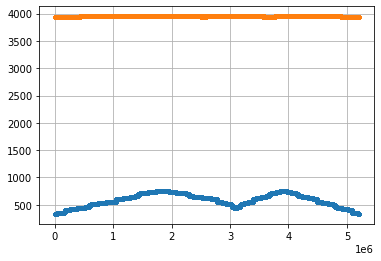

In [25]:
w0 = np.where(np.abs(lon0)<1e100)[0]; print(len(w0))
lon_wi = interpholes(w0,lon0[w0],wi)
lat_wi = interpholes(w0,lat0[w0],wi)
print(len(np.where(np.isfinite(lon_wi)==False)[0]))
print(len(np.where(np.isfinite(lat_wi)==False)[0]))
plt.plot(wi,lon_wi,'.')
plt.plot(wi,lat_wi,'.')
plt.grid()

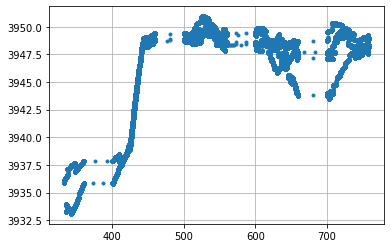

In [26]:
plt.plot(lon_wi,lat_wi,'.')
plt.grid()

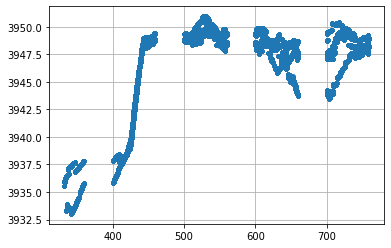

In [17]:
plt.plot(lon0[w0],lat0[w0],'.')
plt.grid()

In [21]:
np.nanmax(np.abs(lon0))

1.7976931348623157e+308

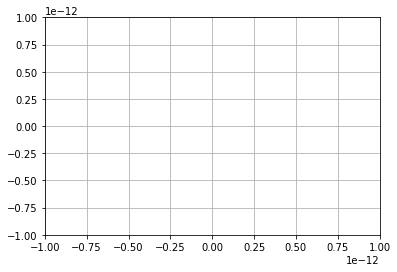

In [18]:
plt.plot(lon0,lat0,'.')
plt.grid()

860264
860264
0


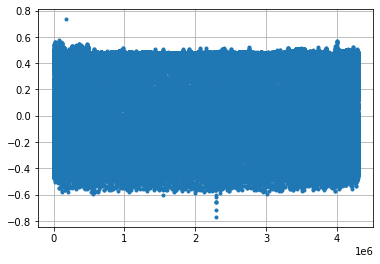

In [210]:
w1 = np.where(np.abs(pitch0)<1e100)[0]; print(len(w1))
pitch_wi = interpholes(w1,pitch0[w1],wi)

w11 = np.where(np.abs(roll0)<1e100)[0]; print(len(w11))
roll_wi = interpholes(w11,roll0[w11],wi)

print(len(np.where(np.isfinite(pitch_wi)==False)[0]))
plt.plot(wi,pitch_wi,'.')
plt.grid()

881494
0


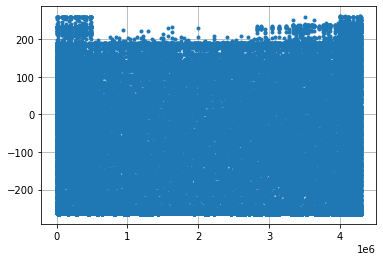

In [211]:
w2 = np.where(np.abs(buoyancy_change0)<1e100)[0]; print(len(w2))
buoyancy_change_wi = interpholes(w2,buoyancy_change0[w2],wi)
print(len(np.where(np.isfinite(buoyancy_change_wi)==False)[0]))
plt.plot(wi,buoyancy_change_wi,'.')
plt.grid()

In [212]:
tctd = tctd0[wi]
T = T0[wi]
C = C0[wi]      # Conductivité
P = P0[wi]      # Pression
lon = lon_wi/100
lat = lat_wi/100     # Conductivité
pitch = pitch_wi
roll = roll_wi
buoyancy_change = buoyancy_change_wi

In [213]:
from datetime import datetime, timedelta
import numpy as np

dt = np.array([datetime.utcfromtimestamp(t) for t in tctd])

YYYY = np.array([d.year for d in dt])
MM   = np.array([d.month for d in dt])
DD   = np.array([d.day for d in dt])
HH   = np.array([d.hour for d in dt])
MN   = np.array([d.minute for d in dt])
SS   = np.array([d.second for d in dt])

print(datetime.fromtimestamp(tctd[0]))
print(datetime.fromtimestamp(tctd[-1]))

2024-05-22 11:55:00.849340
2024-07-04 09:37:29.435970


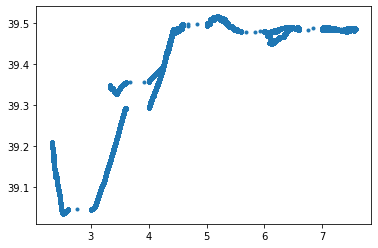

In [214]:
plt.plot(lon,lat,'.')

lon = 6
lat = 39.75

In [215]:
import gsw
# C is given in S/m, and P in bar
SP = gsw.SP_from_C(C*10, T, P*10)
SA = gsw.SA_from_SP(SP, P*10, lon, lat)
rho = gsw.rho_t_exact(SA, T, P*10)

In [216]:
del data

In [217]:
ping_audio(220,.1)

In [218]:
data = dict(time = tctd, pressure = P, pitch = pitch, buoyancy_change=buoyancy_change, density=rho)

import gliderflight
gm = gliderflight.SteadyStateCalibrate(rho0=1024)
gm.set_input_data(**data)
# or, alternatively
# gm.set_input_data(tctd, P, pitch, buoyancy_change, rho)

condition = np.logical_or(P*10<0, P*10>1000)
gm.OR(condition)

gm.define(mg=70.000, Vg=70e-3, Cd0=0.16)
if not gm.undefined_parameters():
    print("We still have undefined parameters...")
    print(gm.undefined_parameters())
    
condition = np.logical_or(P*10<0, P*10>1000)
gm.OR(condition)

calibration_result = gm.calibrate("Vg", "Cd0")
print('Flight Model done')

We still have undefined parameters...
[]
Flight Model done


In [219]:
ping_audio(random.randint(55, 1000),.2)

### Savemat

In [220]:
# gm.t # time
# gm.U # incident velocity
# gm.alpha # angle of attack
# gm.ug    # horizontal speed
# gm.wg    # vertical speed
# gm.w     # vertical water velocity

In [221]:
from scipy.io import savemat
#
GFM = {'GFM': gm.U, 'timestamp': tctd,  'lon': lon, 'lat':lat,
      'YYYY':YYYY,'MM':MM,'DD':DD,'HH':HH, 'MN':MN,'SS':SS,
      'C':C,'T':T,'P':P,'SP':SP,'SA':SA,'rho':rho, 
      'time': gm.t , # time
       'angleofattack': np.degrees(gm.alpha) , # time
       'horizontalspeed':  gm.Vg  , # time
       'verticalspeed': gm.wg , # time
       'pitch': pitch_wi , 
       'roll': roll_wi , 
       'buoyancy_change': buoyancy_change_wi ,       
# gm.U # incident velocity
# gm.alpha # angle of attack
# gm.ug    # horizontal speed
# gm.wg    # vertical speed
# gm.w     # vertical water velocity  
      } 
# 'datetime':dt,
#
gfm_dir = '/Users/floriankokoszka/Desktop/data/glider/teresa/GFM/'
gfmname = fn[:-3]+ '_GFM'
#
savemat(gfm_dir+gfmname+'.mat', GFM)
print('saved\n',gfm_dir,'\n',gfmname)

ping_audio(random.randint(55, 1000),.2)
ping_audio(random.randint(55, 1000),.2)
ping_audio(random.randint(55, 1000),.2)
ping_audio(240,.8)


saved
 /Users/floriankokoszka/Desktop/data/glider/teresa/GFM/ 
 dep0011_teresa_cnr-teresa_L0_2024-05-22_data_dt_GFM


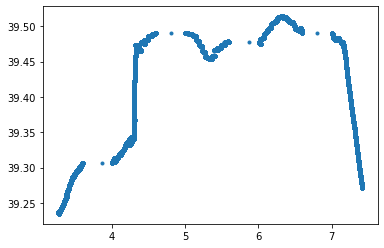

In [48]:
plt.plot(lon,lat,'.')

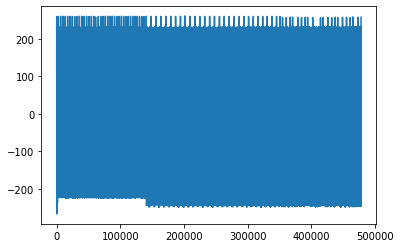

In [49]:
plt.plot(buoyancy_change_wi)

### Plots

dep0005_teresa_cnr-teresa_L0_2015-08-11_data_dt_GFM_incident_water_velocity


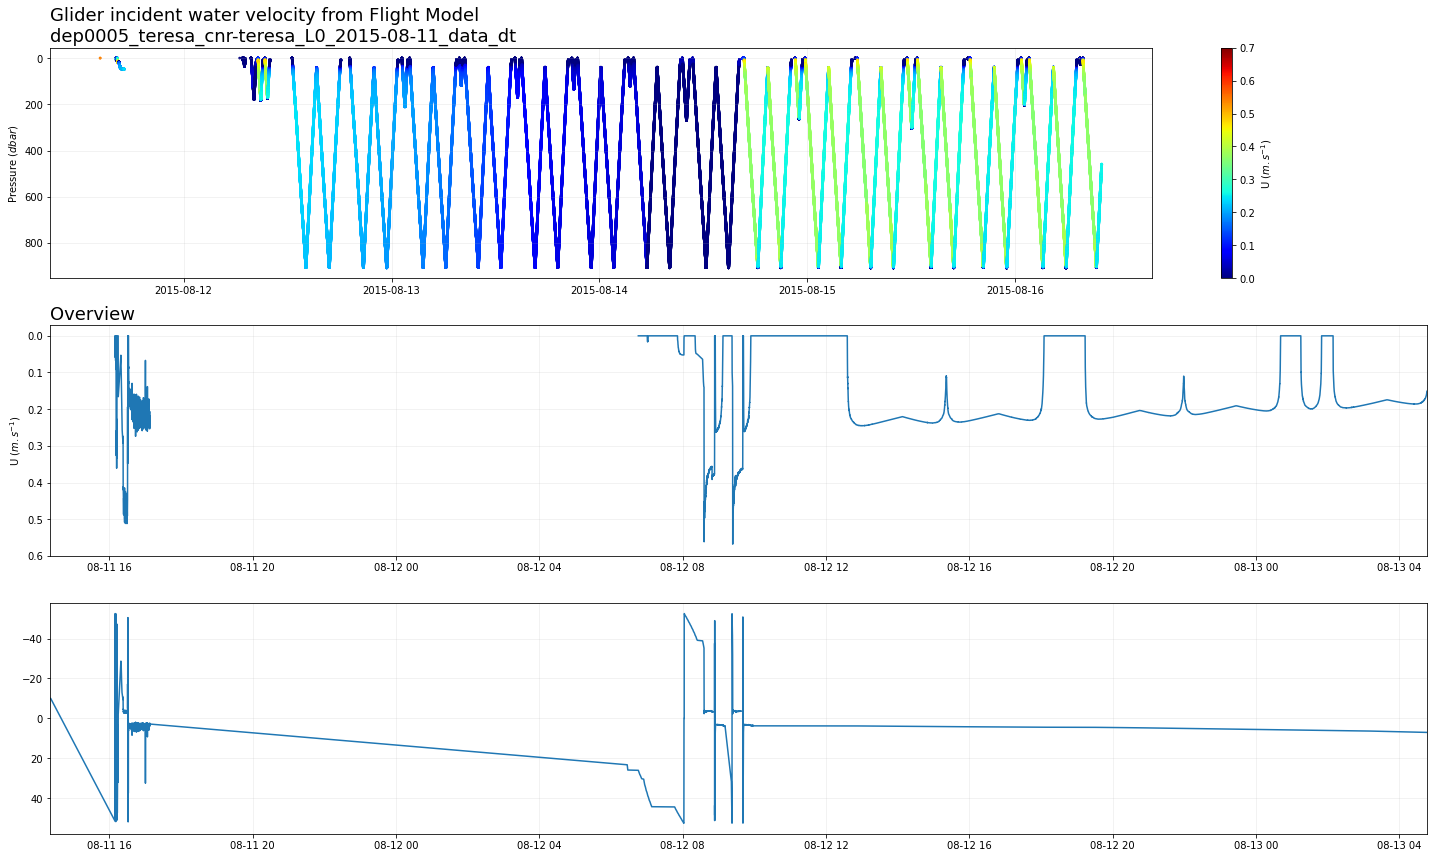

In [284]:
fig , axs =  plt.subplots(3, 1, figsize=(20,12))

ax = axs[0]
sc = ax.scatter(dt,P*10,c=gm.U,s=3, cmap='jet', vmin=0,vmax=.7)
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label('U ($m.s^{-1}$)')
ax.set_ylabel('Pressure ($dbar$)')
ax.grid(alpha=.2)
ax.invert_yaxis()
ax.set_title('Glider incident water velocity from Flight Model \n'+fn[:-3],fontsize=18,loc='left')

ax = axs[1]
ax.plot(dt, gm.U,'-', label='Incident water velocity')
ax.set_ylabel('U ($m.s^{-1}$)')
#ax.legend()
ax.grid(alpha=.2)
ax.invert_yaxis()
ax.set_xlim(dt[int(0*len(dt))],dt[int(0.2*len(dt))])
ax.set_title('Overview',fontsize=18,loc='left')

ax = axs[2]
ax.plot(dt, np.degrees(gm.alpha),'-', label='Angle of attach')
ax.set_ylabel('')
#ax.legend()
ax.grid(alpha=.2)
ax.invert_yaxis()
ax.set_xlim(dt[int(0*len(dt))],dt[int(0.2*len(dt))])
#ax.set_title('Overview',fontsize=18,loc='left')

fig.tight_layout(pad=1)
fig_filename = fn[:-3]+'_GFM_incident_water_velocity'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/data/glider/teresa/GFM/'+fig_filename + '.png',dpi=600)

# OLD

In [4]:
# SIMPLE 

data_dir = '/Users/floriankokoszka/Desktop/data/glider/teresa/TERESA_L1/'
data_dir = '/Volumes/DENISE/data/glider/teresa/glider/TERESA_L1/'

FN = []

#fn = 'dep0005_teresa_cnr-teresa_L1_2015-08-11.nc'
fn = 'dep0001_teresa_cnr-teresa_L1_2017-04-06.nc'; FN.append(fn)
fn = 'dep0003_teresa_cnr-teresa_L1_2017-11-02.nc'; FN.append(fn)
fn = 'dep0004_teresa_cnr-teresa_L1_2018-04-23.nc'; FN.append(fn)
fn = 'dep0006_teresa_cnr-teresa_L1_2020-02-19.nc'; FN.append(fn)
fn = 'dep0007_teresa_cnr-teresa_L1_2020-03-12.nc'; FN.append(fn)
fn = 'dep0008_teresa_cnr-teresa_L1_2022-09-07.nc'; FN.append(fn)
fn = 'dep0009_teresa_cnr-teresa_L1_2022-12-13.nc'; FN.append(fn)
fn = 'dep0010_teresa_cnr-teresa_L1_2023-07-11.nc'; FN.append(fn)
FN


fn = FN[-2]
print(fn)
f = nc4.Dataset(data_dir+fn, 'r')
variable_names = list(f.variables.keys())
print(variable_names)

variable_info = {var: (f.variables[var].dimensions, f.variables[var].size)
                 for var in f.variables}
for var, (dims, size) in variable_info.items():
    print(f"Variable: {var}, Dimensions: {dims}, Number of elements: {size}")

    
FN
f.close()

dep0009_teresa_cnr-teresa_L1_2022-12-13.nc
['trajectory', 'time', 'LAT', 'QC_LAT', 'LON', 'QC_LON', 'PSPEED', 'QC_PSPEED', 'WAYPT_LAT', 'WAYPT_LON', 'WAYPT_DEST_LAT', 'WAYPT_LAST_LON', 'WAYPT_LAST_LAT', 'WAYPT_DEST_LON', 'IRI_SS', 'IRI_REDIALS', 'IRI_ATTEMPTS', 'IRI_PHONE', 'WATER_FINAL_VY', 'WATER_FINAL_VX', 'WATER_VX', 'WATER_VY', 'VOLT', 'AGE', 'AMPH', 'AMPHR_TOTAL', 'LEAK_VOLT', 'LEAK_VOLT_FORWARD', 'VACUUM', 'RANGE', 'BEARING', 'INFLECTION_NUM', 'AVG_SPEED', 'CALL_DURATION', 'USE_CURRENT_CORRECTION']
Variable: trajectory, Dimensions: ('name_strlen',), Number of elements: 20
Variable: time, Dimensions: ('time',), Number of elements: 47
Variable: LAT, Dimensions: ('time',), Number of elements: 47
Variable: QC_LAT, Dimensions: ('time',), Number of elements: 47
Variable: LON, Dimensions: ('time',), Number of elements: 47
Variable: QC_LON, Dimensions: ('time',), Number of elements: 47
Variable: PSPEED, Dimensions: ('time',), Number of elements: 47
Variable: QC_PSPEED, Dimensions: ('tim

In [11]:
# DATA_DT

data_dir = '/Users/floriankokoszka/Desktop/data/glider/teresa/TERESA_L1/'
FN = []
fn = 'dep0005_teresa_cnr-teresa_L1_2015-08-11_data_dt.nc'; FN.append(fn)
fn = 'dep0001_teresa_cnr-teresa_L1_2017-04-06_data_dt.nc'; FN.append(fn)
fn = 'dep0003_teresa_cnr-teresa_L1_2017-11-02_data_dt.nc'; FN.append(fn)
fn = 'dep0004_teresa_cnr-teresa_L1_2018-04-23_data_dt.nc'; FN.append(fn)
fn = 'dep0006_teresa_cnr-teresa_L1_2020-02-19_data_dt.nc'; FN.append(fn)
fn = 'dep0007_teresa_cnr-teresa_L1_2020-03-12_data_dt.nc'; FN.append(fn)
fn = 'dep0008_teresa_cnr-teresa_L1_2022-09-07_data_dt.nc'; FN.append(fn)
fn = 'dep0009_teresa_cnr-teresa_L1_2022-12-13_data_dt.nc'; FN.append(fn)
fn = 'dep0010_teresa_cnr-teresa_L1_2023-07-11_data_dt.nc'; FN.append(fn)
fn = 'dep0011_teresa_cnr-teresa_L1_2024-05-22_data_dt.nc' ; FN.append(fn)

fn = FN[-2]
print(fn)
f = nc4.Dataset(data_dir+fn, 'r')
variable_names = list(f.variables.keys())
print(variable_names)

variable_info = {var: (f.variables[var].dimensions, f.variables[var].size)
                 for var in f.variables}
for var, (dims, size) in variable_info.items():
    print(f"Variable: {var}, Dimensions: {dims}, Number of elements: {size}")

    
FN
f.close()
FN_data_dt = FN

dep0010_teresa_cnr-teresa_L1_2023-07-11_data_dt.nc
['conductivity', 'density', 'depth', 'depth_ctd', 'distance_over_ground', 'heading', 'latitude', 'longitude', 'oxygen_concentration', 'oxygen_saturation', 'pitch', 'pressure', 'profile_direction', 'profile_index', 'roll', 'salinity', 'temperature', 'temperature_oxygen', 'time', 'time_ctd', 'transect_index', 'water_velocity_eastward', 'water_velocity_northward', 'waypoint_latitude', 'waypoint_longitude']
Variable: conductivity, Dimensions: ('time',), Number of elements: 3799134
Variable: density, Dimensions: ('time',), Number of elements: 3799134
Variable: depth, Dimensions: ('time',), Number of elements: 3799134
Variable: depth_ctd, Dimensions: ('time',), Number of elements: 3799134
Variable: distance_over_ground, Dimensions: ('time',), Number of elements: 3799134
Variable: heading, Dimensions: ('time',), Number of elements: 3799134
Variable: latitude, Dimensions: ('time',), Number of elements: 3799134
Variable: longitude, Dimensions: 

In [41]:
# DATA_RT

data_dir = '/Users/floriankokoszka/Desktop/data/glider/teresa/TERESA_L1/'

FN = []

fn = 'dep0005_teresa_cnr-teresa_L1_2015-08-11.nc'
fn = 'dep0001_teresa_cnr-teresa_L1_2017-04-06_data_rt.nc'; FN.append(fn)
fn = 'dep0003_teresa_cnr-teresa_L1_2017-11-02_data_rt.nc'; FN.append(fn)
fn = 'dep0004_teresa_cnr-teresa_L1_2018-04-23_data_rt.nc'; FN.append(fn)
fn = 'dep0006_teresa_cnr-teresa_L1_2020-02-19_data_rt.nc'; FN.append(fn)
fn = 'dep0007_teresa_cnr-teresa_L1_2020-03-12_data_rt.nc'; FN.append(fn)
#fn = 'dep0009_teresa_cnr-teresa_L1_2022-12-13_data_rt.nc'; FN.append(fn)
fn = 'dep0010_teresa_cnr-teresa_L1_2023-07-11_data_rt.nc'; FN.append(fn)

FN

fn = FN[-2]
print(fn)
f = nc4.Dataset(data_dir+fn, 'r')
variable_names = list(f.variables.keys())
print(variable_names)

variable_info = {var: (f.variables[var].dimensions, f.variables[var].size)
                 for var in f.variables}
for var, (dims, size) in variable_info.items():
    print(f"Variable: {var}, Dimensions: {dims}, Number of elements: {size}")

    
FN
f.close()

dep0007_teresa_cnr-teresa_L1_2020-03-12_data_rt.nc
['conductivity', 'density', 'depth', 'depth_ctd', 'distance_over_ground', 'heading', 'latitude', 'longitude', 'oxygen_concentration', 'oxygen_saturation', 'pitch', 'pressure', 'profile_direction', 'profile_index', 'roll', 'salinity', 'temperature', 'temperature_oxygen', 'time', 'water_velocity_eastward', 'water_velocity_northward']
Variable: conductivity, Dimensions: ('time',), Number of elements: 360895
Variable: density, Dimensions: ('time',), Number of elements: 360895
Variable: depth, Dimensions: ('time',), Number of elements: 360895
Variable: depth_ctd, Dimensions: ('time',), Number of elements: 360895
Variable: distance_over_ground, Dimensions: ('time',), Number of elements: 360895
Variable: heading, Dimensions: ('time',), Number of elements: 360895
Variable: latitude, Dimensions: ('time',), Number of elements: 360895
Variable: longitude, Dimensions: ('time',), Number of elements: 360895
Variable: oxygen_concentration, Dimensions

dep0005_teresa_cnr-teresa_L1_2015-08-11_data_dt_RESTAURANT
dep0001_teresa_cnr-teresa_L1_2017-04-06_data_dt_RESTAURANT
dep0003_teresa_cnr-teresa_L1_2017-11-02_data_dt_RESTAURANT
dep0004_teresa_cnr-teresa_L1_2018-04-23_data_dt_RESTAURANT
dep0006_teresa_cnr-teresa_L1_2020-02-19_data_dt_RESTAURANT
dep0007_teresa_cnr-teresa_L1_2020-03-12_data_dt_RESTAURANT
dep0008_teresa_cnr-teresa_L1_2022-09-07_data_dt_RESTAURANT
dep0009_teresa_cnr-teresa_L1_2022-12-13_data_dt_RESTAURANT
dep0010_teresa_cnr-teresa_L1_2023-07-11_data_dt_RESTAURANT
dep0011_teresa_cnr-teresa_L1_2024-05-22_data_dt_RESTAURANT


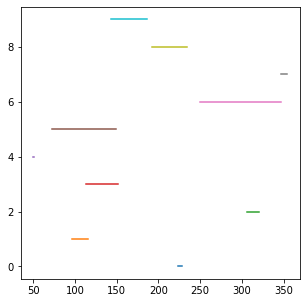

In [12]:
### MAKE RESTAURANT FILES FROM DATA_DT

fig , axs =  plt.subplots(1, 1, figsize=(5,5))
ax = axs

FN = FN_data_dt

for ii in range(0,len(FN)):
    fn = FN[ii]
    
    f = nc4.Dataset(data_dir+fn, 'r')
    
    
    time = np.array(f.variables['time'])
    depth = np.array(f.variables['depth'])
    depth_ctd = np.array(f.variables['depth_ctd'])
    latitude = np.array(f.variables['latitude'])
    longitude = np.array(f.variables['longitude'])
    #
    #x05 = f.variables['profile_index']
    profile_direction = np.array(f.variables['profile_direction'])
    distance_over_ground = np.array(f.variables['distance_over_ground'])
    heading = np.array(f.variables['heading'])
    #x09 = f.variables['transect_index']
    #x10 = f.variables['waypoint_latitude']
    #x11 = f.variables['waypoint_longitude']

    conductivity = np.array(f.variables['conductivity'])
    temperature = np.array(f.variables['temperature'])
    pressure = np.array(f.variables['pressure'])
    salinity = np.array(f.variables['salinity'])
    density = np.array(f.variables['density'])
    oxygen_concentration = np.array(f.variables['oxygen_concentration'])
    oxygen_saturation = np.array(f.variables['oxygen_saturation'])
    temperature_oxygen = np.array(f.variables['temperature_oxygen'])

    pitch = np.array(f.variables['pitch'])
    roll = np.array(f.variables['roll'])

    # time_ctd = np.array(f.variables['time_ctd'])


   #
    from datetime import datetime
    DT = []
    TS = []
    YYYY= []
    MM= []
    DD= []
    HOUR= []
    MIN= []
    SEC= []
    DY = []
    for i in range(0,len(time)):
        dt = datetime.fromtimestamp(int(time[i]))
        ts = datetime.timestamp(dt)
        DT.append(dt)
        TS.append(ts)
        period = pd.Period(dt, freq='D')
        DY.append(period.dayofyear)


        YYYY.append(dt.year)
        MM.append(dt.month)
        DD.append(dt.day)
        HOUR.append(dt.hour)
        MIN.append(dt.minute)
        SEC.append(dt.second)

    dy = np.array(DY)    
    dt = np.array(DT)
    ts = np.array(TS)
    YYYY = np.array(YYYY)
    MM = np.array(MM)
    DD = np.array(DD)
    HOUR = np.array(HOUR)
    MIN = np.array(MIN)
    SEC = np.array(SEC)
    

    #
    import haversine as hs
    DIST = []
    lon = longitude*1
    lat = latitude*1
    f = np.where(np.isfinite(lon)==1)[0]
    loc1=(lon[f[0]],lat[f[0]])
    for i in range(0,len(lon)):
        loc2=(lon[i],lat[i])
        DIST.append(hs.haversine(loc1,loc2))
    DIST = np.array(DIST)

    from scipy.io import savemat
    #
    M3 = {'time': time,'latitude':latitude, 'longitude':longitude, 'depth':depth,'depth_ctd':depth_ctd,       
         'conductivity': conductivity,'temperature': temperature,'temperature': temperature,'pressure': pressure,
         'salinity': salinity,'density': density,'oxygen_concentration': oxygen_concentration,
         'temperature_oxygen': temperature_oxygen,'pitch': pitch,'roll': roll,
         'profile_direction': profile_direction,'distance_over_ground': distance_over_ground,'heading': heading, 
         'YYYY':YYYY,'MM':MM,'DD':DD,'HOUR':HOUR, 'MIN':MIN,'SEC':SEC}
    #
    hotel_dir = '/Users/floriankokoszka/Desktop/data/glider/teresa/hotels/'
    hotelname3 = fn[:-3]+ '_RESTAURANT'
    #
    savemat(hotel_dir+hotelname3+'.mat', M3)

    #
    print(hotelname3)
    
    ax.plot([dy[0],dy[-1]],[ii,ii],'-')


In [4]:
%store -r MMDD_GLIDER_CTD 
%store -r YYYY_GLIDER_CTD 
%store -r DY_GLIDER_CTD 
%store -r DT_GLIDER_CTD 
%store -r TS_GLIDER_CTD 
%store -r LON_GLIDER_CTD 
%store -r LAT_GLIDER_CTD 

(array([  42.,    0.,  566.,  596.,    0., 1222.,    0.,    0.,    0.,
         932.]),
 array([16658.76612269, 16952.0285787 , 17245.29103472, 17538.55349074,
        17831.81594676, 18125.07840278, 18418.3408588 , 18711.60331481,
        19004.86577083, 19298.12822685, 19591.39068287]),
 <BarContainer object of 10 artists>)

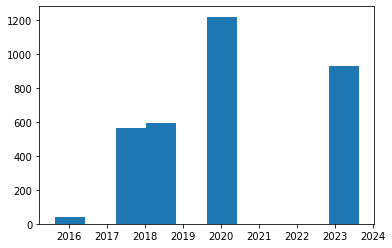

In [7]:
plt.hist(DT_GLIDER_CTD)

In [8]:
%cd /Users/floriankokoszka/desktop/data/glider/teresa/TERESA_L2
%ls

/Users/floriankokoszka/Desktop/data/glider/teresa/TERESA_L2
dep0001_teresa_cnr-teresa_L2_2017-04-06_data_dt.nc
dep0001_teresa_cnr-teresa_L2_2017-04-06_data_rt.nc
dep0003_teresa_cnr-teresa_L2_2017-11-02_data_dt.nc
dep0003_teresa_cnr-teresa_L2_2017-11-02_data_rt.nc
dep0004_teresa_cnr-teresa_L2_2018-04-23_data_dt.nc
dep0004_teresa_cnr-teresa_L2_2018-04-23_data_rt.nc
dep0005_teresa_cnr-teresa_L2_2015-08-11_data_dt.nc
dep0005_teresa_cnr-teresa_L2_2015-08-11_data_rt.nc
dep0006_teresa_cnr-teresa_L2_2020-02-19_data_dt.nc
dep0006_teresa_cnr-teresa_L2_2020-02-19_data_rt.nc
dep0007_teresa_cnr-teresa_L2_2020-03-12_data_dt.nc
dep0007_teresa_cnr-teresa_L2_2020-03-12_data_rt.nc
dep0009_teresa_cnr-teresa_L2_2022-12-13_data_dt.nc
dep0010_teresa_cnr-teresa_L2_2023-07-11_data_dt.nc
dep0010_teresa_cnr-teresa_L2_2023-07-11_data_rt.nc


In [9]:
data_dir = '/Users/floriankokoszka/Desktop/data/glider/teresa/TERESA_L2/'
FN = []
fn = 'dep0001_teresa_cnr-teresa_L2_2017-04-06_data_dt.nc'; FN.append(fn)
fn = 'dep0003_teresa_cnr-teresa_L2_2017-11-02_data_dt.nc'; FN.append(fn)
fn = 'dep0004_teresa_cnr-teresa_L2_2018-04-23_data_dt.nc'; FN.append(fn)
fn = 'dep0005_teresa_cnr-teresa_L2_2015-08-11_data_dt.nc'; FN.append(fn)
fn = 'dep0006_teresa_cnr-teresa_L2_2020-02-19_data_dt.nc'; FN.append(fn)
fn = 'dep0007_teresa_cnr-teresa_L2_2020-03-12_data_dt.nc'; FN.append(fn)
#fn = 'dep0009_teresa_cnr-teresa_L2_2022-12-13_data_dt.nc'; FN.append(fn)
#fn = 'dep0010_teresa_cnr-teresa_L2_2023-07-11_data_dt.nc'; FN.append(fn)


f = nc4.Dataset(data_dir+fn, 'r')
print(fn)


dep0007_teresa_cnr-teresa_L2_2020-03-12_data_dt.nc


In [13]:
dataset = nc4.Dataset(data_dir+fn, 'r')
variable_names = list(dataset.variables.keys())
variable_names

['conductivity',
 'density',
 'depth',
 'latitude',
 'longitude',
 'oxygen_concentration',
 'oxygen_saturation',
 'pressure',
 'profile_index',
 'salinity',
 'temperature',
 'time']

In [283]:
ii = 5

fn = FN[ii]
f = nc4.Dataset(data_dir+fn, 'r')

In [285]:

ii = 5
fn = FN[ii]
f = nc4.Dataset(data_dir+fn, 'r')

time = np.array(f.variables['time'])
depth = np.array(f.variables['depth'])
latitude = np.array(f.variables['latitude'])
longitude = np.array(f.variables['longitude'])

conductivity = np.array(f.variables['conductivity'])
temperature = np.array(f.variables['temperature'])
pressure = np.array(f.variables['pressure'])
salinity = np.array(f.variables['salinity'])
density = np.array(f.variables['density'])
oxygen_concentration = np.array(f.variables['oxygen_concentration'])
oxygen_saturation = np.array(f.variables['oxygen_saturation'])

#
from datetime import datetime
DT = []
TS = []
DY = []
MMDD = []
YYYY = []
for i in range(0,len(time)):
    dt = datetime.fromtimestamp(int(time[i]))
    ts = datetime.timestamp(dt)
    DT.append(dt)
    TS.append(ts)
    period = pd.Period(dt, freq='D')
    DY.append(period.dayofyear)
    YYYY.append(dt.year)
    MMDD.append(dt.month+ (dt.day)/31)

dt = np.array(DT)
ts = np.array(TS)
dy = np.array(DY)
#
import haversine as hs
DIST = []
lon = longitude*1
lat = latitude*1
f = np.where(np.isfinite(lon)==1)[0]
loc1=(lon[f[0]],lat[f[0]])
for i in range(0,len(lon)):
    loc2=(lon[i],lat[i])
    DIST.append(hs.haversine(loc1,loc2))
DIST = np.array(DIST)

f = np.where(latitude > 1e308)[0]
len(f)
latitude[f] = np.nan

f = np.where(longitude > 1e308)[0]
len(f)
longitude[f] = np.nan


ff = np.where(np.isfinite(longitude*latitude) == True)[0]
lon = longitude[ff]
lat = latitude[ff]
dt = np.array(DT)[ff]
ts = np.array(TS)[ff]
dy = np.array(DY)[ff]
yyyy = np.array(YYYY)[ff]
mmdd = np.array(MMDD)[ff]

s1 = len(ff)
s2 = len(depth)
#
T = np.empty((s1,s2))  * np.nan
C = np.empty((s1,s2))   * np.nan
P = np.empty((s1,s2))       * np.nan
S = np.empty((s1,s2))       * np.nan
RHO = np.empty((s1,s2))      *np.nan
OXC = np.empty((s1,s2))  *np.nan
OXS = np.empty((s1,s2))  *np.nan
#
for ii in range(0,len(ff)):
    i = ff[ii]

    f = np.where(temperature[i,:] < 1e308)[0]
    T[ii,f] = temperature[i,f]

    f = np.where(conductivity[i,:] < 1e308)[0]
    C[ii,f] = conductivity[i,f]

    f = np.where(pressure[i,:] < 1e308)[0]
    P[ii,f] = pressure[i,f]

    f = np.where(salinity[i,:] < 1e308)[0]
    S[ii,f] = salinity[i,f]

    f = np.where(density[i,:] < 1e308)[0]
    RHO[ii,f] = density[i,f]

    f = np.where(oxygen_concentration[i,:] < 1e308)[0]
    OXC[ii,f] = oxygen_concentration[i,f]

    f = np.where(oxygen_saturation[i,:] < 1e308)[0]
    OXS[ii,f] = oxygen_saturation[i,f]

print(DT[0])
print(DT[-1]) 




2020-03-12 12:35:59
2020-05-28 11:12:30


In [286]:
T.shape

(1116, 959)

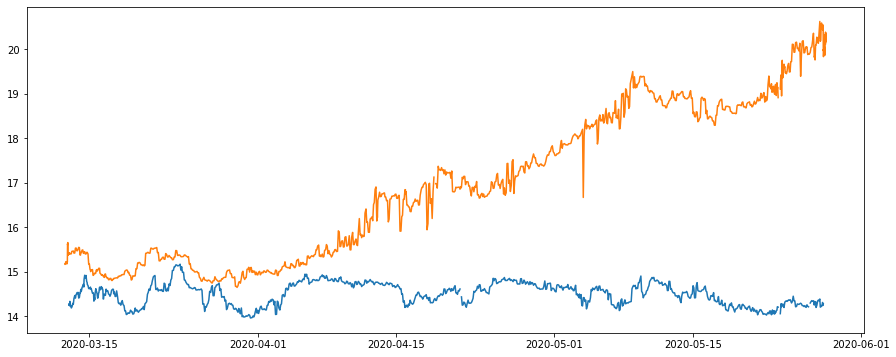

In [290]:
fig , axs =  plt.subplots(1, 1, figsize=(15,6))

ax = axs

ax.plot(dt,T[:,100].flatten(),'-')
ax.plot(dt,T[:,10].flatten(),'-')



In [294]:
print(np.nanmin(lon))
print(np.nanmax(lon))

print(np.nanmin(lat))

print(np.nanmax(lat))


np.nanmean(np.abs(np.diff(lon)))

3.5478020376627555
7.964957629629959
39.55111785857557
39.84889334822847


0.013702407397229107

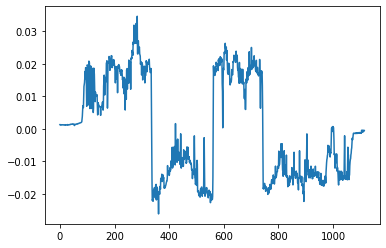

In [295]:
plt.plot(np.diff(lon))

In [308]:
np.nanmean(OXS)

69.8919699407767

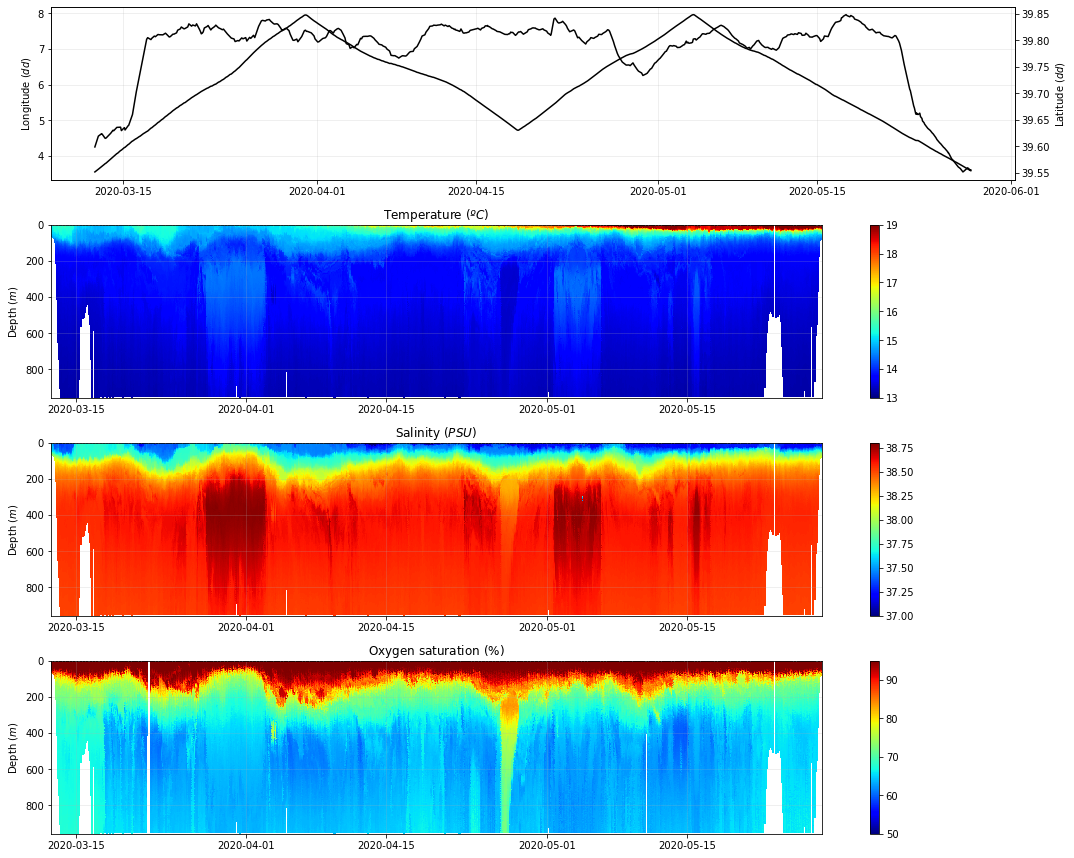

In [410]:
XX, YY = np.meshgrid(np.arange(0,len(lon),1),depth)
XX, YY = np.meshgrid(dt,depth)
#XX, YY = np.meshgrid(lon,depth)


fig , axs =  plt.subplots(4, 1, figsize=(15,12))

ax = axs[0]
ax.plot(dt,lon,'k-',lw=1.5)
ax.set_ylabel('Longitude $(dd)$')
ax2 = ax.twinx()
ax2.plot(dt,lat,'k-',lw=1.5)
ax2.set_ylabel('Latitude $(dd)$')
ax.grid(alpha=.25)

ax = axs[1]
ZZ = np.transpose(T)
cmap = 'jet'
vmin = 13
vmax = 19
b = np.arange(vmin,vmax,1)
c = ax.pcolor(XX,YY,ZZ, cmap=cmap, vmin=vmin, vmax=vmax, shading='auto',label='')
ax.invert_yaxis()
cbar = fig.colorbar(c, ax=ax)
ax.set_ylabel('Depth $(m)$')
ax.set_title('Temperature $(ºC)$')
ax.grid(alpha=.25)



ax = axs[2]
ZZ = np.transpose(S)
cmap = 'jet'
vmin = 37.0
vmax = 38.8
b = np.arange(vmin,vmax,1)
c = ax.pcolor(XX,YY,ZZ, cmap=cmap, vmin=vmin, vmax=vmax, shading='auto',label='')
ax.invert_yaxis()
cbar = fig.colorbar(c, ax=ax)
ax.set_ylabel('Depth $(m)$')
ax.set_title('Salinity $(PSU)$')
ax.grid(alpha=.25)

ax = axs[3]
ZZ = np.transpose(OXS)
cmap = 'jet'
vmin = 50.0
vmax = 95.0
b = np.arange(vmin,vmax,1)
c = ax.pcolor(XX,YY,ZZ, cmap=cmap, vmin=vmin, vmax=vmax, shading='auto',label='')
ax.invert_yaxis()
cbar = fig.colorbar(c, ax=ax)
ax.set_ylabel('Depth $(m)$')
ax.set_title('Oxygen saturation $(\%)$')
ax.grid(alpha=.25)



fig.tight_layout(pad=1)

figname = 'pcolor_T_S_O_2020'
fig.savefig('/Users/floriankokoszka/Desktop/data/microrider/plots/'+ figname+ '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/data/microrider/plots/'+ figname+ '.png',dpi= 600)


In [349]:
AS = S * np.nan
CT = S * np.nan
N2 = S * np.nan
SIG0 = S * np.nan
CTH0 = S * np.nan
THT0 = S * np.nan
D = S * np.nan
for i in range(0,T.shape[0]):
    
    f = np.where(np.isfinite(P[i,:]*S[i,:]/T[i,:])==True)[0]
    if len(f)>0:
        sali = S[i,f]
        pres = P[i,f]
        temp = T[i,f]
        deph = depth[f]

        lo = lon[i]
        la = lat[i]

        asal = gsw.SA_from_SP(sali, pres, lo, la)
        ctem = gsw.CT_from_t(asal, temp,pres)
        sig0 = gsw.sigma0(asal,ctem)
        n2, p_mid = gsw.Nsquared(asal,ctem,pres, la,axis=0)
        n2 = interpholes(p_mid,n2,pres)
        n2 = np.array(n2) 
        cth0 = gsw.pt_from_CT(asal, ctem)
        p_ref = 0
        tht0 = gsw.pt_from_t(asal,ctem,pres,p_ref)
        
        AS[i,f] = asal
        CT[i,f] = ctem
        N2[i,f] = n2
        SIG0[i,f] = sig0
        CTH0[i,f] = cth0
        THT0[i,f] = tht0
        D[i,f] = deph


In [355]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
# Définitions
colors_list = [(161, 213, 255),
               #(116, 237, 148),  # GREENS
               (8, 194, 58),

              (255, 255, 105),
              (255, 239, 15),  # YELLOWS
              (255, 208, 0),

              (255, 162, 0),
              (255, 119, 0), # ORANGES
              (255, 85, 0),

              (250, 27, 135),
              (235, 54, 255),  # REDS
               (162, 62, 250),
               ]
pseudo_hsv_cmap = colors.LinearSegmentedColormap.from_list('my_colormap', (np.array(colors_list)/255), N=10)

colorbar_range = np.arange(0,900+100,100 )
len(colorbar_range)

10

In [377]:
len(y)

900

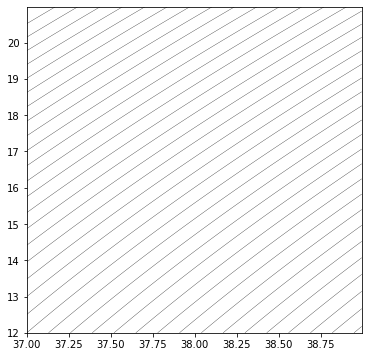

In [386]:
x = np.arange(37,39,0.005)
y = np.arange(12,21,0.01)
SIG_CTR = np.empty((len(x),len(y))) * np.nan
b = np.arange(26,30,0.1)                   
for i in range(0,len(x)):
    i
    for j in range(0,len(y)):
        SIG_CTR[i,j] = gsw.sigma0(x[i],y[j])
        
YY, XX = np.meshgrid(y,x)
fig , axs =  plt.subplots(1,1, figsize=(2,2))
ax = axs
cs = ax.contour(XX,YY,SIG_CTR,levels= b,colors='k', linewidths=.3, linestyles='solid' )


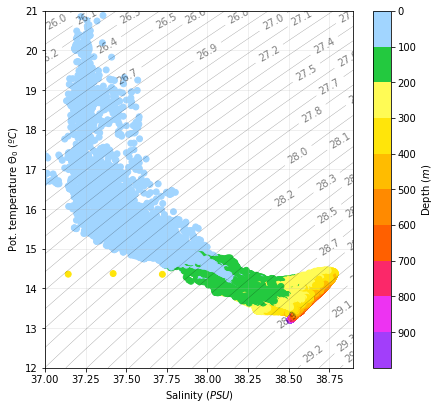

In [396]:


dr = 10
reduc = np.arange(0,len(S.flatten()),dr)
###
fig , axs =  plt.subplots(1,1, figsize=(6,5.5))

ax = axs

y = THT0.flatten()[reduc][::-1]
y = T.flatten()[reduc][::-1]

x = S.flatten()[reduc][::-1]
z = D.flatten()[reduc][::-1]
#
cs = ax.contour(XX,YY,SIG_CTR,levels= b,colors='k', linewidths=.3, linestyles='solid',alpha=.5 )
cs.clabel(b, inline=True, fontsize=10)

cax = ax.scatter(x, y, c=z, s=35, vmin=0, vmax=1000,cmap=pseudo_hsv_cmap)
cbar = fig.colorbar(cax, ticks=colorbar_range,label='Depth $(m)$')
cbar.ax.invert_yaxis()

ax.set_ylabel('Pot. temperature $\Theta_0$ $(ºC)$')
ax.set_xlabel('Salinity $(PSU)$')
ax.set_title('', fontsize=20)
ax.grid(alpha=.25)

ax.set_xlim(37,38.9)
ax.set_ylim(12,21)

fig.tight_layout(pad=0)
figname = 'scatter_T_S'
fig.savefig('/Users/floriankokoszka/Desktop/data/microrider/plots/'+ figname+ '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/data/microrider/plots/'+ figname+ '.png',dpi= 600)



In [ ]:
import gsw

In [ ]:
N22 = SA*np.nan
N2_al = N2*np.nan

idz = 1
dz = 2*idz
for i in range(0,SA.shape[1]):
    sigm = SIG0[:,i]
    
    for l in range(idz+1,len(sigm)-idz):
        dsigm = sigm[l+idz]-sigm[l-idz]
        N22[l,i] = (9.81/1e3)*(dsigm)/(dz)
    
    si = np.argsort(sigm)
    sigm = sigm[si]
    for l in range(idz+1,len(sigm)-idz):
        dsigm = sigm[l+idz]-sigm[l-idz]
        N2_al[l,i] = (9.81/1e3)*(dsigm)/(dz)
        
    #n2, p_mid = gsw.Nsquared(SA[:,i], CT[:,i], P[:,i], lat_ctd[i],axis=0)
    #n2 = interpholes(p_mid,n2,P[:,i])
    # N2[:,i] = n2

In [404]:
XX.shape

(156, 156)

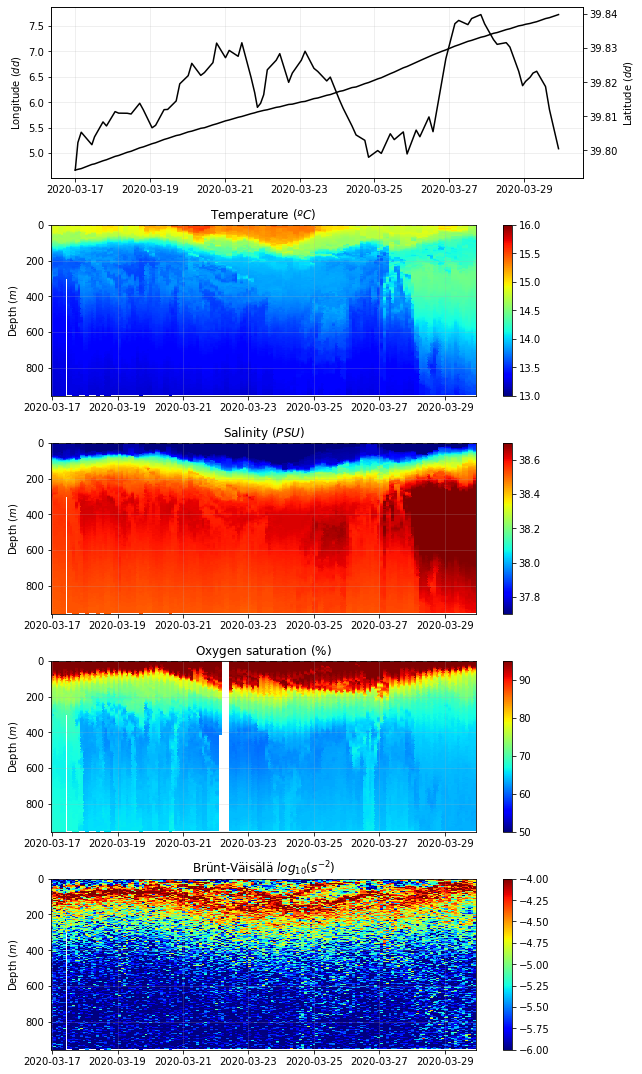

In [424]:
XX, YY = np.meshgrid(np.arange(0,len(lon[FPERIOD]),1),depth)
XX, YY = np.meshgrid(dt[FPERIOD],depth)
#XX, YY = np.meshgrid(lon,depth)


fig , axs =  plt.subplots(5, 1, figsize=(9,15))

ax = axs[0]
ax.plot(dt[FPERIOD],lon[FPERIOD],'k-',lw=1.5)
ax.set_ylabel('Longitude $(dd)$')
ax2 = ax.twinx()
ax2.plot(dt[FPERIOD],lat[FPERIOD],'k-',lw=1.5)
ax2.set_ylabel('Latitude $(dd)$')
ax.grid(alpha=.25)

ax = axs[1]
ZZ = np.transpose(T[FPERIOD,:])
cmap = 'jet'
vmin = 13
vmax = 16
b = np.arange(vmin,vmax,1)
c = ax.pcolor(XX,YY,ZZ, cmap=cmap, vmin=vmin, vmax=vmax, shading='auto',label='')
ax.invert_yaxis()
cbar = fig.colorbar(c, ax=ax)
ax.set_ylabel('Depth $(m)$')
ax.set_title('Temperature $(ºC)$')
ax.grid(alpha=.25)



ax = axs[2]
ZZ = np.transpose(S[FPERIOD,:])
cmap = 'jet'
vmin = 37.7
vmax = 38.7
b = np.arange(vmin,vmax,1)
c = ax.pcolor(XX,YY,ZZ, cmap=cmap, vmin=vmin, vmax=vmax, shading='auto',label='')
ax.invert_yaxis()
cbar = fig.colorbar(c, ax=ax)
ax.set_ylabel('Depth $(m)$')
ax.set_title('Salinity $(PSU)$')
ax.grid(alpha=.25)

ax = axs[3]
ZZ = np.transpose(OXS[FPERIOD,:])
cmap = 'jet'
vmin = 50.0
vmax = 95.0
b = np.arange(vmin,vmax,1)
c = ax.pcolor(XX,YY,ZZ, cmap=cmap, vmin=vmin, vmax=vmax, shading='auto',label='')
ax.invert_yaxis()
cbar = fig.colorbar(c, ax=ax)
ax.set_ylabel('Depth $(m)$')
ax.set_title('Oxygen saturation $(\%)$')
ax.grid(alpha=.25)

ax = axs[4]
ZZ = np.transpose(np.log10(np.abs(N2[FPERIOD,:])))
cmap = 'jet'
vmin = -6
vmax = -4
b = np.arange(vmin,vmax,1)
c = ax.pcolor(XX,YY,ZZ, cmap=cmap, vmin=vmin, vmax=vmax, shading='auto',label='')
ax.invert_yaxis()
cbar = fig.colorbar(c, ax=ax)
ax.set_ylabel('Depth $(m)$')
ax.set_title('Brünt-Väisälä $log_{10}(s^{-2})$')
ax.grid(alpha=.25)

fig.tight_layout(pad=1)

figname = 'pcolor_T_S_O_2020_ZOOM'
fig.savefig('/Users/floriankokoszka/Desktop/data/microrider/plots/'+ figname+ '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/data/microrider/plots/'+ figname+ '.png',dpi= 600)


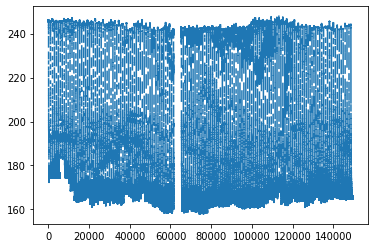

In [427]:
plt.plot(OXC[FPERIOD,:].flatten())

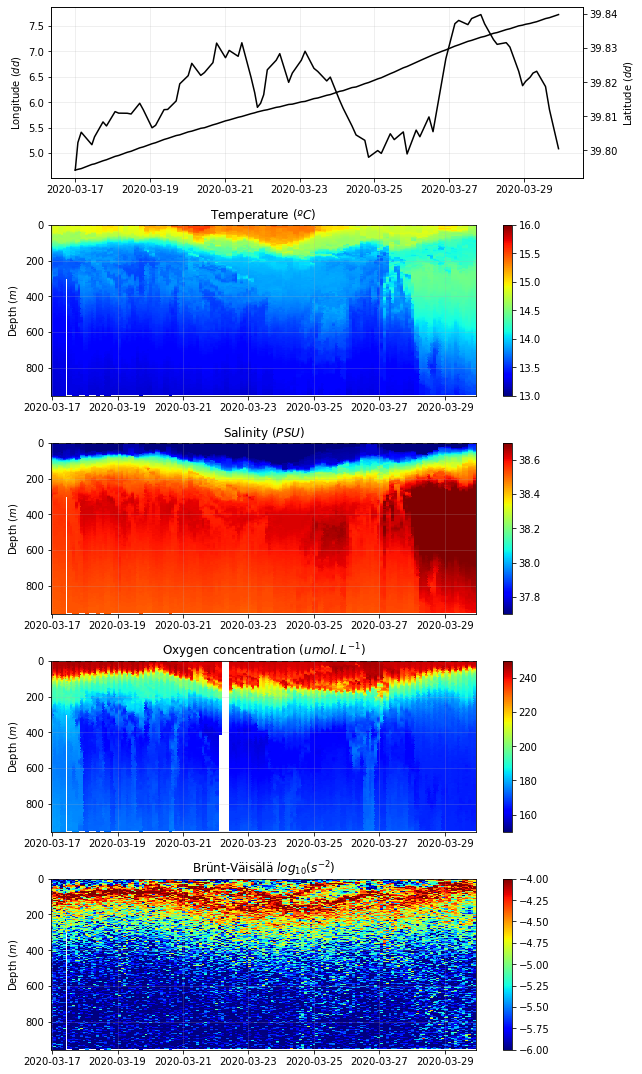

In [430]:
XX, YY = np.meshgrid(np.arange(0,len(lon[FPERIOD]),1),depth)
XX, YY = np.meshgrid(dt[FPERIOD],depth)
#XX, YY = np.meshgrid(lon,depth)


fig , axs =  plt.subplots(5, 1, figsize=(9,15))

ax = axs[0]
ax.plot(dt[FPERIOD],lon[FPERIOD],'k-',lw=1.5)
ax.set_ylabel('Longitude $(dd)$')
ax2 = ax.twinx()
ax2.plot(dt[FPERIOD],lat[FPERIOD],'k-',lw=1.5)
ax2.set_ylabel('Latitude $(dd)$')
ax.grid(alpha=.25)

ax = axs[1]
ZZ = np.transpose(T[FPERIOD,:])
cmap = 'jet'
vmin = 13
vmax = 16
b = np.arange(vmin,vmax,1)
c = ax.pcolor(XX,YY,ZZ, cmap=cmap, vmin=vmin, vmax=vmax, shading='auto',label='')
ax.invert_yaxis()
cbar = fig.colorbar(c, ax=ax)
ax.set_ylabel('Depth $(m)$')
ax.set_title('Temperature $(ºC)$')
ax.grid(alpha=.25)



ax = axs[2]
ZZ = np.transpose(S[FPERIOD,:])
cmap = 'jet'
vmin = 37.7
vmax = 38.7
b = np.arange(vmin,vmax,1)
c = ax.pcolor(XX,YY,ZZ, cmap=cmap, vmin=vmin, vmax=vmax, shading='auto',label='')
ax.invert_yaxis()
cbar = fig.colorbar(c, ax=ax)
ax.set_ylabel('Depth $(m)$')
ax.set_title('Salinity $(PSU)$')
ax.grid(alpha=.25)

ax = axs[3]
ZZ = np.transpose(OXC[FPERIOD,:])
cmap = 'jet'
vmin = 150.0
vmax = 250.0
b = np.arange(vmin,vmax,1)
c = ax.pcolor(XX,YY,ZZ, cmap=cmap, vmin=vmin, vmax=vmax, shading='auto',label='')
ax.invert_yaxis()
cbar = fig.colorbar(c, ax=ax)
ax.set_ylabel('Depth $(m)$')
ax.set_title('Oxygen concentration $(umol.L^{-1})$')
ax.grid(alpha=.25)

ax = axs[4]
ZZ = np.transpose(np.log10(np.abs(N2[FPERIOD,:])))
cmap = 'jet'
vmin = -6
vmax = -4
b = np.arange(vmin,vmax,1)
c = ax.pcolor(XX,YY,ZZ, cmap=cmap, vmin=vmin, vmax=vmax, shading='auto',label='')
ax.invert_yaxis()
cbar = fig.colorbar(c, ax=ax)
ax.set_ylabel('Depth $(m)$')
ax.set_title('Brünt-Väisälä $log_{10}(s^{-2})$')
ax.grid(alpha=.25)

fig.tight_layout(pad=1)

figname = 'pcolor_T_S_O_2020_ZOOM'
fig.savefig('/Users/floriankokoszka/Desktop/data/microrider/plots/'+ figname+ '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/data/microrider/plots/'+ figname+ '.png',dpi= 600)


In [3]:
%cd /Users/floriankokoszka/desktop/data/glider/teresa/TERESA_L1
%ls

/Users/floriankokoszka/Desktop/data/glider/teresa/TERESA_L1
dep0001_teresa_cnr-teresa_L1_2017-04-06.nc
dep0001_teresa_cnr-teresa_L1_2017-04-06_data_dt.nc
dep0001_teresa_cnr-teresa_L1_2017-04-06_data_rt.nc
dep0003_teresa_cnr-teresa_L1_2017-11-02.nc
dep0003_teresa_cnr-teresa_L1_2017-11-02_data_dt.nc
dep0003_teresa_cnr-teresa_L1_2017-11-02_data_rt.nc
dep0004_teresa_cnr-teresa_L1_2018-04-23.nc
dep0004_teresa_cnr-teresa_L1_2018-04-23_data_dt.nc
dep0004_teresa_cnr-teresa_L1_2018-04-23_data_rt.nc
dep0005_teresa_cnr-teresa_L1_2015-08-11_data_dt.nc
dep0005_teresa_cnr-teresa_L1_2015-08-11_data_rt.nc
dep0006_teresa_cnr-teresa_L1_2020-02-19.nc
dep0006_teresa_cnr-teresa_L1_2020-02-19_data_dt.nc
dep0006_teresa_cnr-teresa_L1_2020-02-19_data_rt.nc
dep0007_teresa_cnr-teresa_L1_2020-03-12.nc
dep0007_teresa_cnr-teresa_L1_2020-03-12_data_dt.nc
dep0007_teresa_cnr-teresa_L1_2020-03-12_data_rt.nc
dep0008_teresa_cnr-teresa_L1_2022-09-07.nc
dep0008_teresa_cnr-teresa_L1_2022-09-07_data_dt.nc
dep0009_teresa_cnr-

In [4]:
data_dir = '/Users/floriankokoszka/Desktop/data/glider/teresa/TERESA_L1/'

fn = 'dep0005_teresa_cnr-teresa_L1_2015-08-11_data_dt.nc'
fn = 'dep0001_teresa_cnr-teresa_L1_2017-04-06_data_dt.nc'
fn = 'dep0003_teresa_cnr-teresa_L1_2017-11-02_data_dt.nc'
fn = 'dep0004_teresa_cnr-teresa_L1_2018-04-23_data_dt.nc'
fn = 'dep0006_teresa_cnr-teresa_L1_2020-02-19_data_dt.nc'
fn = 'dep0007_teresa_cnr-teresa_L1_2020-03-12_data_dt.nc'
fn = 'dep0008_teresa_cnr-teresa_L1_2022-09-07_data_dt.nc'
fn = 'dep0009_teresa_cnr-teresa_L1_2022-12-13_data_dt.nc'

fn = 'dep0010_teresa_cnr-teresa_L1_2023-07-11_data_dt.nc'
fn = 'dep0011_teresa_cnr-teresa_L1_2024-05-22_data_dt.nc'

f = nc4.Dataset(data_dir+fn, 'r')

In [5]:
variable_names = list(f.variables.keys())
variable_names

['conductivity',
 'density',
 'depth',
 'depth_ctd',
 'distance_over_ground',
 'heading',
 'latitude',
 'longitude',
 'oxygen_concentration',
 'oxygen_saturation',
 'pitch',
 'pressure',
 'profile_direction',
 'profile_index',
 'roll',
 'salinity',
 'temperature',
 'temperature_oxygen',
 'time',
 'time_ctd',
 'transect_index',
 'water_velocity_eastward',
 'water_velocity_northward',
 'waypoint_latitude',
 'waypoint_longitude']

In [6]:
print(fn)

dep0011_teresa_cnr-teresa_L1_2024-05-22_data_dt.nc


In [7]:
f = nc4.Dataset(data_dir+fn, 'r')

time = np.array(f.variables['time'])
depth = np.array(f.variables['depth'])
depth_ctd = np.array(f.variables['depth_ctd'])
latitude = np.array(f.variables['latitude'])
longitude = np.array(f.variables['longitude'])
#
#x05 = f.variables['profile_index']
profile_direction = np.array(f.variables['profile_direction'])
distance_over_ground = np.array(f.variables['distance_over_ground'])
heading = np.array(f.variables['heading'])
#x09 = f.variables['transect_index']
#x10 = f.variables['waypoint_latitude']
#x11 = f.variables['waypoint_longitude']

conductivity = np.array(f.variables['conductivity'])
temperature = np.array(f.variables['temperature'])
pressure = np.array(f.variables['pressure'])
salinity = np.array(f.variables['salinity'])
density = np.array(f.variables['density'])
oxygen_concentration = np.array(f.variables['oxygen_concentration'])
oxygen_saturation = np.array(f.variables['oxygen_saturation'])
temperature_oxygen = np.array(f.variables['temperature_oxygen'])

pitch = np.array(f.variables['pitch'])
roll = np.array(f.variables['roll'])

time_ctd = np.array(f.variables['time_ctd'])

#
from datetime import datetime
DT = []
TS = []
for i in range(0,len(time)):
    dt = datetime.fromtimestamp(int(time[i]))
    ts = datetime.timestamp(dt)
    DT.append(dt)
    TS.append(ts)
dt = np.array(DT)
ts = np.array(TS)

#
import haversine as hs
DIST = []
lon = longitude*1
lat = latitude*1
f = np.where(np.isfinite(lon)==1)[0]
loc1=(lon[f[0]],lat[f[0]])
for i in range(0,len(lon)):
    loc2=(lon[i],lat[i])
    DIST.append(hs.haversine(loc1,loc2))
DIST = np.array(DIST)

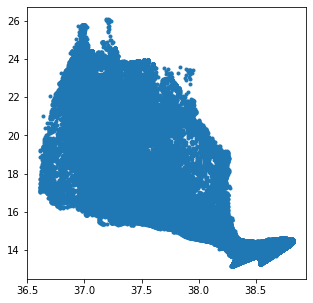

In [8]:
f = np.where( (temperature < 1e308) & (salinity < 1e308))[0]

fig , axs =  plt.subplots(1, 1, figsize=(5,5))
ax = axs
ax.plot(salinity[f],temperature[f],'.')

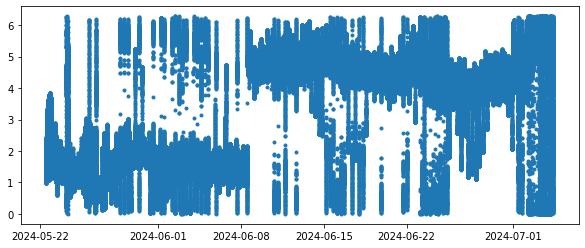

In [9]:
f = np.where( (heading < 1e10) )[0]

fig , axs =  plt.subplots(1, 1, figsize=(10,4))
ax = axs
ax.plot(dt[f],heading[f],'.')

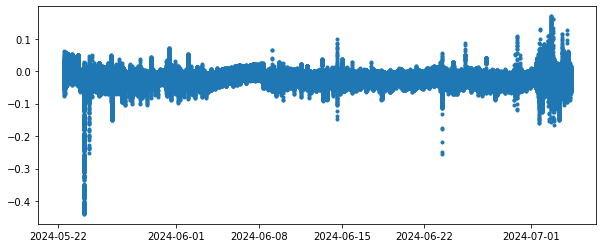

In [10]:
f = np.where( (roll < 1e10) )[0]

fig , axs =  plt.subplots(1, 1, figsize=(10,4))
ax = axs
ax.plot(dt[f],roll[f],'.')

In [438]:
len(f)

252133

In [20]:
data_dir = '/Users/floriankokoszka/Desktop/data/glider/teresa/TERESA_L1/'

FN = []

#fn = 'dep0005_teresa_cnr-teresa_L1_2015-08-11.nc'
fn = 'dep0001_teresa_cnr-teresa_L1_2017-04-06.nc'; FN.append(fn)
fn = 'dep0003_teresa_cnr-teresa_L1_2017-11-02.nc'; FN.append(fn)
fn = 'dep0004_teresa_cnr-teresa_L1_2018-04-23.nc'; FN.append(fn)
fn = 'dep0006_teresa_cnr-teresa_L1_2020-02-19.nc'; FN.append(fn)
fn = 'dep0007_teresa_cnr-teresa_L1_2020-03-12.nc'; FN.append(fn)
fn = 'dep0008_teresa_cnr-teresa_L1_2022-09-07.nc'; FN.append(fn)
fn = 'dep0009_teresa_cnr-teresa_L1_2022-12-13.nc'; FN.append(fn)
fn = 'dep0010_teresa_cnr-teresa_L1_2023-07-11.nc'; FN.append(fn)
FN





['dep0001_teresa_cnr-teresa_L1_2017-04-06.nc',
 'dep0003_teresa_cnr-teresa_L1_2017-11-02.nc',
 'dep0004_teresa_cnr-teresa_L1_2018-04-23.nc',
 'dep0006_teresa_cnr-teresa_L1_2020-02-19.nc',
 'dep0007_teresa_cnr-teresa_L1_2020-03-12.nc',
 'dep0008_teresa_cnr-teresa_L1_2022-09-07.nc',
 'dep0009_teresa_cnr-teresa_L1_2022-12-13.nc',
 'dep0010_teresa_cnr-teresa_L1_2023-07-11.nc']

In [452]:
i = 4 
#i = 4
#i = 5
#i = 6

fn = FN[i]

f = nc4.Dataset(data_dir+fn, 'r')

time = np.array(f.variables['time'])
LAT = np.array(f.variables['LAT'])
LON = np.array(f.variables['LON'])
PSPEED = np.array(f.variables['PSPEED'])
QC_PSPEED = np.array(f.variables['QC_PSPEED'])
AVG_SPEED = np.array(f.variables['AVG_SPEED'])

#
from datetime import datetime
DT = []
TS = []
YYYY= []
MM= []
DD= []
HOUR= []
MIN= []
SEC= []

for i in range(0,len(time)):
    dt = datetime.fromtimestamp(int(time[i]))
    ts = datetime.timestamp(dt)
    DT.append(dt)
    TS.append(ts)

    YYYY.append(dt.year)
    MM.append(dt.month)
    DD.append(dt.day)
    HOUR.append(dt.hour)
    MIN.append(dt.minute)
    SEC.append(dt.second)

dt = np.array(DT)
ts = np.array(TS)
YYYY = np.array(YYYY)
MM = np.array(MM)
DD = np.array(DD)
HOUR = np.array(HOUR)
MIN = np.array(MIN)
SEC = np.array(SEC)

#
import haversine as hs
DIST = []
lon = LON*1
lat = LAT*1
f = np.where(np.isfinite(lon)==1)[0]
loc1=(lon[f[0]],lat[f[0]])
for i in range(0,len(lon)):
    loc2=(lon[i],lat[i])
    DIST.append(hs.haversine(loc1,loc2))
DIST = np.array(DIST)



if fn == 'ddep0006_teresa_cnr-teresa_L1_2020-02-19.nc' :
    dt_2020_1 = dt
    ts_2020_1 = ts
    lo_2020_1 = lon
    la_2020_1 = lat

    %store dt_2020_1
    %store ts_2020_1
    %store lo_2020_1
    %store la_2020_1
    
if fn == 'dep0007_teresa_cnr-teresa_L1_2020-03-12.nc' :
    dt_2020_2 = dt
    ts_2020_2 = ts
    lo_2020_2 = lon
    la_2020_2 = lat

    %store dt_2020_2
    %store ts_2020_2
    %store lo_2020_2
    %store la_2020_2
    
    
    

if fn == 'dep0008_teresa_cnr-teresa_L1_2022-09-07.nc' :
    dt_2022_1 = dt
    ts_2022_1 = ts
    lo_2022_1 = lon
    la_2022_1 = lat

    %store dt_2022_1
    %store ts_2022_1
    %store lo_2022_1
    %store la_2022_1
    
if fn == 'dep0009_teresa_cnr-teresa_L1_2022-12-13.nc' :
    dt_2022_2 = dt
    ts_2022_2 = ts
    lo_2022_2 = lon
    la_2022_2 = lat

    %store dt_2022_2
    %store ts_2022_2
    %store lo_2022_2
    %store la_2022_2
    

Stored 'dt_2020_2' (ndarray)
Stored 'ts_2020_2' (ndarray)
Stored 'lo_2020_2' (ndarray)
Stored 'la_2020_2' (ndarray)


In [456]:
len(AVG_SPEED)

864

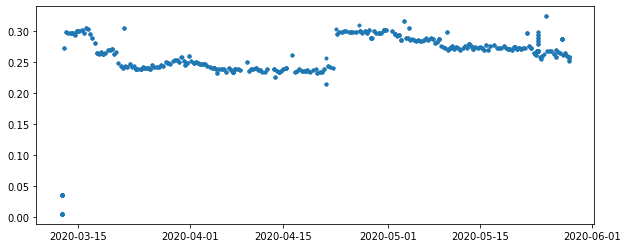

In [454]:
f = np.where( (AVG_SPEED < 1e10) )[0]

fig , axs =  plt.subplots(1, 1, figsize=(10,4))
ax = axs
ax.plot(dt[f],AVG_SPEED[f],'.')
    

    

In [21]:
FN

['dep0001_teresa_cnr-teresa_L1_2017-04-06.nc',
 'dep0003_teresa_cnr-teresa_L1_2017-11-02.nc',
 'dep0004_teresa_cnr-teresa_L1_2018-04-23.nc',
 'dep0006_teresa_cnr-teresa_L1_2020-02-19.nc',
 'dep0007_teresa_cnr-teresa_L1_2020-03-12.nc',
 'dep0008_teresa_cnr-teresa_L1_2022-09-07.nc',
 'dep0009_teresa_cnr-teresa_L1_2022-12-13.nc',
 'dep0010_teresa_cnr-teresa_L1_2023-07-11.nc']

In [19]:
FN

['dep0001_teresa_cnr-teresa_L2_2017-04-06_data_dt.nc',
 'dep0003_teresa_cnr-teresa_L2_2017-11-02_data_dt.nc',
 'dep0004_teresa_cnr-teresa_L2_2018-04-23_data_dt.nc',
 'dep0005_teresa_cnr-teresa_L2_2015-08-11_data_dt.nc',
 'dep0006_teresa_cnr-teresa_L2_2020-02-19_data_dt.nc',
 'dep0007_teresa_cnr-teresa_L2_2020-03-12_data_dt.nc']

In [122]:
for i in range(0,len(FN)):
    fn = FN[i]
    
    f = nc4.Dataset(data_dir+fn, 'r')
    
    time = np.array(f.variables['time'])
    LAT = np.array(f.variables['LAT'])
    LON = np.array(f.variables['LON'])
    PSPEED = np.array(f.variables['PSPEED'])
    QC_PSPEED = np.array(f.variables['QC_PSPEED'])
    AVG_SPEED = np.array(f.variables['AVG_SPEED'])

    #
    from datetime import datetime
    DT = []
    TS = []
    YYYY= []
    MM= []
    DD= []
    HOUR= []
    MIN= []
    SEC= []
        
    for i in range(0,len(time)):
        dt = datetime.fromtimestamp(int(time[i]))
        ts = datetime.timestamp(dt)
        DT.append(dt)
        TS.append(ts)
        
        YYYY.append(dt.year)
        MM.append(dt.month)
        DD.append(dt.day)
        HOUR.append(dt.hour)
        MIN.append(dt.minute)
        SEC.append(dt.second)
        
    dt = np.array(DT)
    ts = np.array(TS)
    YYYY = np.array(YYYY)
    MM = np.array(MM)
    DD = np.array(DD)
    HOUR = np.array(HOUR)
    MIN = np.array(MIN)
    SEC = np.array(SEC)

    #
    import haversine as hs
    DIST = []
    lon = LON*1
    lat = LAT*1
    f = np.where(np.isfinite(lon)==1)[0]
    loc1=(lon[f[0]],lat[f[0]])
    for i in range(0,len(lon)):
        loc2=(lon[i],lat[i])
        DIST.append(hs.haversine(loc1,loc2))
    DIST = np.array(DIST)

    from scipy.io import savemat
    #
    M1 = {'data': PSPEED, 'time': time}
    M2 = {'PSPEED': PSPEED, 'time': time, 'LAT':LAT, 'LON':LON, 'QC_PSPEED':QC_PSPEED,'AVG_SPEED':AVG_SPEED, 'YYYY':YYYY,'MM':MM,'DD':DD,'HOUR':HOUR, 'MIN':MIN,'SEC':SEC }
    #
    hotel_dir = '/Users/floriankokoszka/Desktop/data/glider/teresa/hotels/'
    hotelname1 = fn[:-3]+ '_HOTEL'
    hotelname2 = fn[:-3]+ '_CINEMA'
    #
    savemat(hotel_dir+hotelname1+'.mat', M1)
    savemat(hotel_dir+hotelname2+'.mat', M2)

    #
    print('yop')


yop
yop
yop
yop
yop
yop
yop
yop


In [217]:
i = 5
fn = FN[i]
fn

'dep0007_teresa_cnr-teresa_L1_2020-03-12_data_dt.nc'

In [218]:
fn = FN[i]

f = nc4.Dataset(data_dir+fn, 'r')


time = np.array(f.variables['time'])
depth = np.array(f.variables['depth'])
depth_ctd = np.array(f.variables['depth_ctd'])
latitude = np.array(f.variables['latitude'])
longitude = np.array(f.variables['longitude'])
#
#x05 = f.variables['profile_index']
profile_direction = np.array(f.variables['profile_direction'])
distance_over_ground = np.array(f.variables['distance_over_ground'])
heading = np.array(f.variables['heading'])
#x09 = f.variables['transect_index']
#x10 = f.variables['waypoint_latitude']
#x11 = f.variables['waypoint_longitude']

conductivity = np.array(f.variables['conductivity'])
temperature = np.array(f.variables['temperature'])
pressure = np.array(f.variables['pressure'])
salinity = np.array(f.variables['salinity'])
density = np.array(f.variables['density'])
oxygen_concentration = np.array(f.variables['oxygen_concentration'])
oxygen_saturation = np.array(f.variables['oxygen_saturation'])
temperature_oxygen = np.array(f.variables['temperature_oxygen'])

pitch = np.array(f.variables['pitch'])
roll = np.array(f.variables['roll'])

# time_ctd = np.array(f.variables['time_ctd'])


#
from datetime import datetime
DT = []
TS = []
YYYY= []
MM= []
DD= []
HOUR= []
MIN= []
SEC= []
DY = []
for i in range(0,len(time)):
    dt = datetime.fromtimestamp(int(time[i]))
    ts = datetime.timestamp(dt)
    DT.append(dt)
    TS.append(ts)
    period = pd.Period(dt, freq='D')
    DY.append(period.dayofyear)


    YYYY.append(dt.year)
    MM.append(dt.month)
    DD.append(dt.day)
    HOUR.append(dt.hour)
    MIN.append(dt.minute)
    SEC.append(dt.second)

dy = np.array(DY)
dt = np.array(DT)
ts = np.array(TS)
YYYY = np.array(YYYY)
MM = np.array(MM)
DD = np.array(DD)
HOUR = np.array(HOUR)
MIN = np.array(MIN)
SEC = np.array(SEC)


#
import haversine as hs
DIST = []
lon = longitude*1
lat = latitude*1
f = np.where(np.isfinite(lon)==1)[0]
loc1=(lon[f[0]],lat[f[0]])
for i in range(0,len(lon)):
    loc2=(lon[i],lat[i])
    DIST.append(hs.haversine(loc1,loc2))
DIST = np.array(DIST)



In [219]:
print(dt[0],dt[-1])


2020-03-12 12:00:00 2020-05-28 11:21:14


In [213]:
period = pd.Period(dt[-1], freq='D')
#dy[i] = 
period.dayofyear

226

dep0005_teresa_cnr-teresa_L1_2015-08-11_data_dt_RESTAURANT
dep0001_teresa_cnr-teresa_L1_2017-04-06_data_dt_RESTAURANT
dep0003_teresa_cnr-teresa_L1_2017-11-02_data_dt_RESTAURANT
dep0004_teresa_cnr-teresa_L1_2018-04-23_data_dt_RESTAURANT
dep0006_teresa_cnr-teresa_L1_2020-02-19_data_dt_RESTAURANT
dep0007_teresa_cnr-teresa_L1_2020-03-12_data_dt_RESTAURANT
dep0009_teresa_cnr-teresa_L1_2022-12-13_data_dt_RESTAURANT
dep0010_teresa_cnr-teresa_L1_2023-07-11_data_dt_RESTAURANT


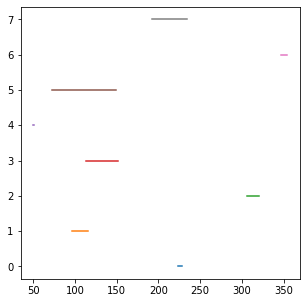

In [204]:
fig , axs =  plt.subplots(1, 1, figsize=(5,5))
ax = axs


for ii in range(0,len(FN)):
    fn = FN[ii]
    
    f = nc4.Dataset(data_dir+fn, 'r')
    
    
    time = np.array(f.variables['time'])
    depth = np.array(f.variables['depth'])
    depth_ctd = np.array(f.variables['depth_ctd'])
    latitude = np.array(f.variables['latitude'])
    longitude = np.array(f.variables['longitude'])
    #
    #x05 = f.variables['profile_index']
    profile_direction = np.array(f.variables['profile_direction'])
    distance_over_ground = np.array(f.variables['distance_over_ground'])
    heading = np.array(f.variables['heading'])
    #x09 = f.variables['transect_index']
    #x10 = f.variables['waypoint_latitude']
    #x11 = f.variables['waypoint_longitude']

    conductivity = np.array(f.variables['conductivity'])
    temperature = np.array(f.variables['temperature'])
    pressure = np.array(f.variables['pressure'])
    salinity = np.array(f.variables['salinity'])
    density = np.array(f.variables['density'])
    oxygen_concentration = np.array(f.variables['oxygen_concentration'])
    oxygen_saturation = np.array(f.variables['oxygen_saturation'])
    temperature_oxygen = np.array(f.variables['temperature_oxygen'])

    pitch = np.array(f.variables['pitch'])
    roll = np.array(f.variables['roll'])

    # time_ctd = np.array(f.variables['time_ctd'])


   #
    from datetime import datetime
    DT = []
    TS = []
    YYYY= []
    MM= []
    DD= []
    HOUR= []
    MIN= []
    SEC= []
    DY = []
    for i in range(0,len(time)):
        dt = datetime.fromtimestamp(int(time[i]))
        ts = datetime.timestamp(dt)
        DT.append(dt)
        TS.append(ts)
        period = pd.Period(dt, freq='D')
        DY.append(period.dayofyear)


        YYYY.append(dt.year)
        MM.append(dt.month)
        DD.append(dt.day)
        HOUR.append(dt.hour)
        MIN.append(dt.minute)
        SEC.append(dt.second)

    dy = np.array(DY)    
    dt = np.array(DT)
    ts = np.array(TS)
    YYYY = np.array(YYYY)
    MM = np.array(MM)
    DD = np.array(DD)
    HOUR = np.array(HOUR)
    MIN = np.array(MIN)
    SEC = np.array(SEC)
    

    #
    import haversine as hs
    DIST = []
    lon = longitude*1
    lat = latitude*1
    f = np.where(np.isfinite(lon)==1)[0]
    loc1=(lon[f[0]],lat[f[0]])
    for i in range(0,len(lon)):
        loc2=(lon[i],lat[i])
        DIST.append(hs.haversine(loc1,loc2))
    DIST = np.array(DIST)

    from scipy.io import savemat
    #
    M3 = {'time': time,'latitude':latitude, 'longitude':longitude, 'depth':depth,'depth_ctd':depth_ctd,       
         'conductivity': conductivity,'temperature': temperature,'temperature': temperature,'pressure': pressure,
         'salinity': salinity,'density': density,'oxygen_concentration': oxygen_concentration,
         'temperature_oxygen': temperature_oxygen,'pitch': pitch,'roll': roll,
         'profile_direction': profile_direction,'distance_over_ground': distance_over_ground,'heading': heading, 
         'YYYY':YYYY,'MM':MM,'DD':DD,'HOUR':HOUR, 'MIN':MIN,'SEC':SEC}
    #
    hotel_dir = '/Users/floriankokoszka/Desktop/data/glider/teresa/hotels/'
    hotelname3 = fn[:-3]+ '_RESTAURANT'
    #
    savemat(hotel_dir+hotelname3+'.mat', M3)

    #
    print(hotelname3)
    
    ax.plot([dy[0],dy[-1]],[ii,ii],'-')


In [205]:
fig_doy = fig
%store fig_doy

Stored 'fig_doy' (Figure)


In [129]:
FN[3]
FN[4]

'dep0007_teresa_cnr-teresa_L1_2020-03-12_data_rt.nc'

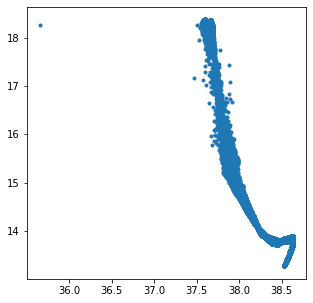

In [282]:
f = np.where( (temperature < 1e308) & (salinity < 1e308))[0]


fig , axs =  plt.subplots(1, 1, figsize=(5,5))
ax = axs
ax.plot(salinity[f],temperature[f],'.')


In [265]:
41+42

83

In [185]:
# if L1
#
x00 = np.array(f.variables['time'])
x01 = np.array(f.variables['depth'])
x02 = np.array(f.variables['depth_ctd'])
x03 = np.array(f.variables['latitude'])
x04 = np.array(f.variables['longitude'])
#
#x05 = f.variables['profile_index']
#x06 = f.variables['profile_direction']
#x07 = f.variables['distance_over_ground']
#x08 = f.variables['heading']
#x09 = f.variables['transect_index']
#x10 = f.variables['waypoint_latitude']
#x11 = f.variables['waypoint_longitude']

x12 = np.array(f.variables['conductivity'])
x13 = np.array(f.variables['temperature'])
x14 = np.array(f.variables['pressure'])
x15 = np.array(f.variables['salinity'])
x16 = np.array(f.variables['density'])
x17 = np.array(f.variables['oxygen_concentration'])
x18 = np.array(f.variables['oxygen_saturation'])
x19 = np.array(f.variables['temperature_oxygen'])

x20 = np.array(f.variables['pitch'])
x21 = np.array(f.variables['roll'])

x22 = np.array(f.variables['time_ctd'])
#x23 = f.variables['water_velocity_eastward']
#x24 = f.variables['water_velocity_northward']

from datetime import datetime
DT = []
TS = []
for i in range(0,len(x00)):
    dt = datetime.fromtimestamp(int(x00[i]))
    ts = datetime.timestamp(dt)
    DT.append(dt)
    TS.append(ts)
dt = np.array(DT)
ts = np.array(TS)

x01[x01>1e9] = np.nan
x03[x03>1e9] = np.nan
x04[x04>1e9] = np.nan

import haversine as hs
#    3 
# 1  2
DIST = []
lon = x04
lat = x03
f = np.where(np.isfinite(lon)==1)[0]
loc1=(lon[f[0]],lat[f[0]])
for i in range(0,len(lon)):
    
    loc2=(lon[i],lat[i])
    DIST.append(hs.haversine(loc1,loc2))
DIST = np.array(DIST)

print('yop')

yop


In [213]:
hotel_dir = '/Users/floriankokoszka/Desktop/data/glider/teresa/hotels/'

In [214]:
from scipy.io import savemat

a = np.arange(20)
mstruct = {'a': a, 'label': 'experiment'}
mstruct


filename = 'matlab_matrix'
savemat(hotel_dir+filename+'.mat', mstruct)

In [211]:
x00 = np.array(f.variables['time'])
x01 = np.array(f.variables['depth'])

ff = np.where(x01 > 1e9)[0]
len(ff)

1

In [210]:
x01

array([1.79769313e+308, 0.00000000e+000, 0.00000000e+000, ...,
       0.00000000e+000, 4.22278000e-002, 0.00000000e+000])

In [192]:
f = np.where(np.array(x02) == 1.79769313e+308)[0]
len(f)

0

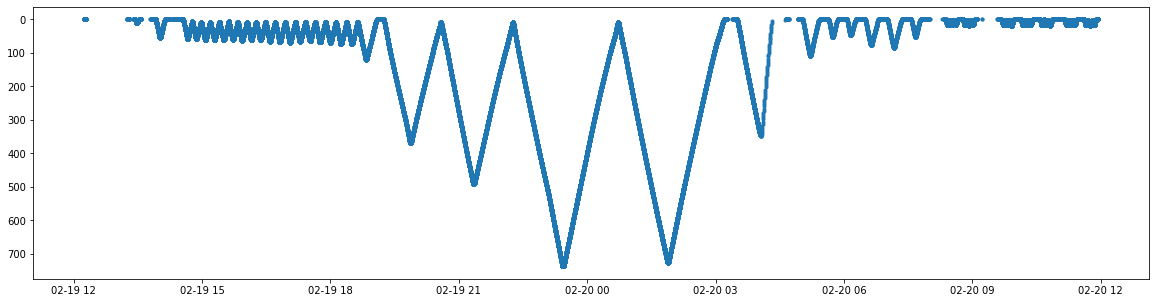

In [186]:
fig , axs =  plt.subplots(1, 1, figsize=(20,5))
#
ax = axs
ax.plot(dt,np.array(x01),'.')
ax.invert_yaxis()


In [178]:
lon[0]

nan

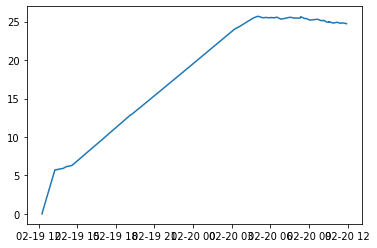

In [187]:
plt.plot(dt,DIST)


Text(0.5, 1.0, '$toto$')

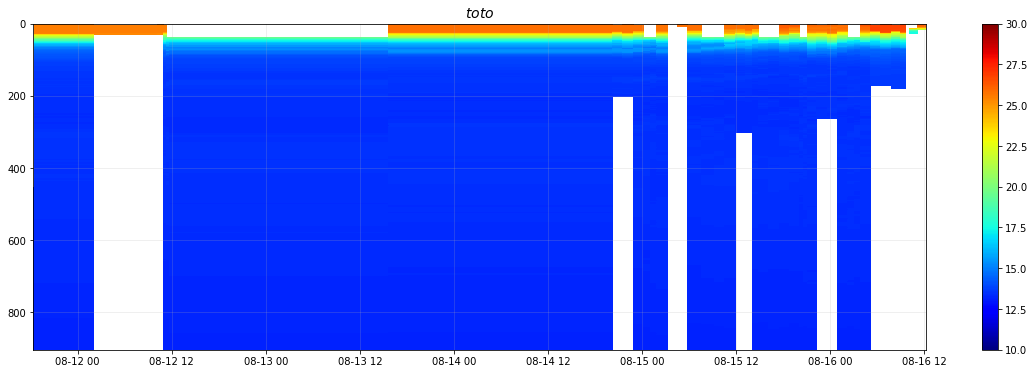

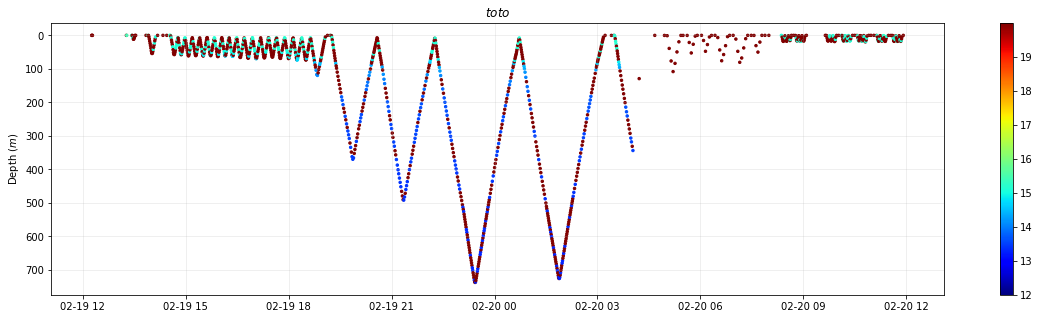

In [188]:
YEAH= 2017

v1 = 12
v2 = 20
dv = 1
b = np.arange(v1,v2,dv)
mrks = 6

v = np.arange(0,len(dt),50)

fig , axs =  plt.subplots(1,1, figsize=(20,5))
ax = axs
cax = ax.scatter(dt[v], x01[v], s= mrks, c=x13[v], vmin=v1, vmax=v2,cmap='jet')
ax.grid(alpha=.25)
ax.invert_yaxis()
cbar = fig.colorbar(cax, ticks=b)
ax.set_ylabel('Depth $(m)$')
ax.set_title('$toto$')

if YEAH == 2015: dt1 = datetime(2015,8,12);  dt2 = datetime(2015,8,17)
elif YEAH== 2017: dt1 = datetime(2017,4,5);  dt2 = datetime(2017,4,10)
elif YEAH == 2018: dt1 = datetime(2018,4,5);  dt2 = datetime(2018,4,27)
elif YEAH == 2022: dt1 = datetime(2022,9,5);  dt2 = datetime(2022,11,25)
elif YEAH == 2023: dt1 = datetime(2023,7,8);  dt2 = datetime(2023,8,19)
elif YEAH == 2020: dt1 = datetime(2020,3,10);  dt2 = datetime(2020,4,5)
        
#dt1 = datetime(2023,7,17);  dt2 = datetime(2023,7,21)
#ax.set_xlim(dt1,dt2)
#ax.set_ylim(200,0)







(0.0, 50.0)

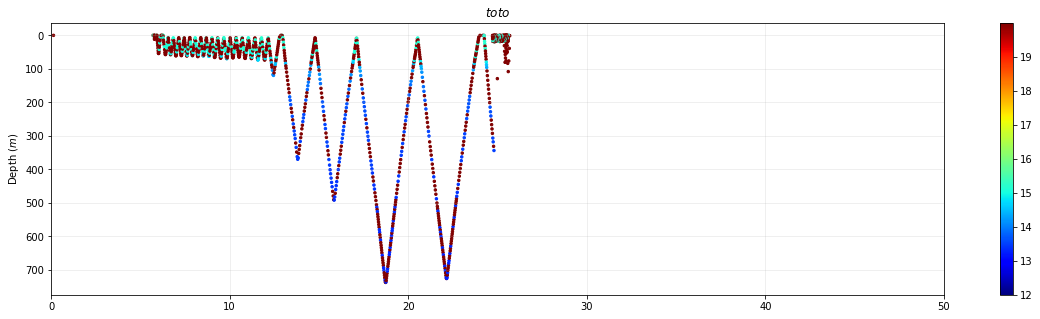

In [189]:
YEAH= 2017

v1 = 12
v2 = 20
dv = 1
b = np.arange(v1,v2,dv)
mrks = 6

v = np.arange(0,len(dt),50)

fig , axs =  plt.subplots(1,1, figsize=(20,5))
ax = axs
cax = ax.scatter(DIST[v], x01[v], s= mrks, c=x13[v], vmin=v1, vmax=v2,cmap='jet')
ax.grid(alpha=.25)
ax.invert_yaxis()
cbar = fig.colorbar(cax, ticks=b)
ax.set_ylabel('Depth $(m)$')
ax.set_title('$toto$')
ax.set_xlim(0,50)


In [ ]:
cmap = 'jet'
XX, YY = np.meshgrid(dt,x01)

fig , axs =  plt.subplots(1, 1, figsize=(20,6))
ax = axs
#
ZZ = np.rot90(x06)
ZZ = np.rot90(x06, k=1, axes=(1,0))

vmin = 10
vmax = 30
c = ax.pcolor(XX,YY,ZZ, cmap=cmap, vmin=vmin, vmax=vmax, shading='auto',label='')
ax.invert_yaxis()
fig.colorbar(c, ax=ax)
#ax.set_xticks(np.arange(0,len(LADCPNAM),1))
#ax.set_xticklabels(LADCPNAM,fontsize=9,rotation=90)
ax.grid(alpha=.25)
ax.set_title('$toto$',fontsize=14)